### Now for the big question. Salary

Let's have a go at creating a basic regression model that predicts salary.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('C:/Users/Cristian/AppData/Local/Programs/Python/Data science learning/Udacity/survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A quick look to find the quantitative columns in our datased and some quick stats on them.

In [14]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,19102.000000,16102.000000,15253.000000,7721.000000,13452.000000,5009.000000,818.000000
mean,9551.500000,7.343932,7.000721,3.685922,8.357865,58341.398571,32231.521687
std,5514.416757,1.919330,2.128648,7.330691,1.405546,40753.384986,28543.877274
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4776.250000,6.000000,6.000000,0.000000,8.000000,27956.989247,4716.459735
50%,9551.500000,8.000000,7.000000,1.000000,8.000000,51612.903226,29784.946237
75%,14326.750000,9.000000,8.000000,3.000000,9.000000,83333.333333,50000.000000
max,19102.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


A picture can often tell us more than numbers.

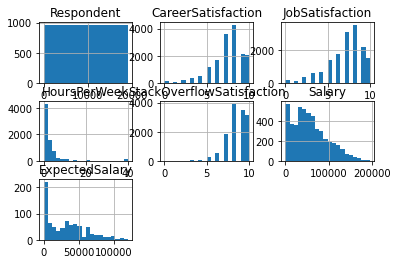

In [15]:
df.hist(bins = 20);

Often a useful plot is a correlation matrix - this can tell you which variables are related to one another.

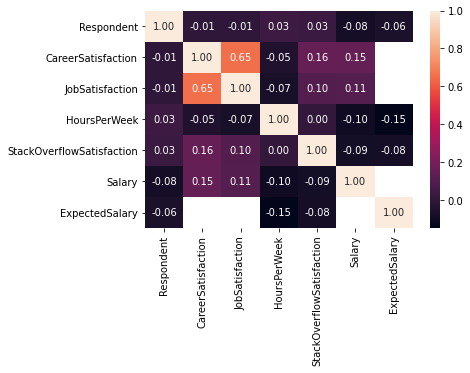

In [16]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

A few things can be observed from the above. The least surprising is that career satisfaction seems to have an impact on salary with the most satisfied people having the biggest pay. You wouldn't know if the money is making people happy or happy people are making money but I'd wager it's the latter.

The other more surprising thing is that working a lot of hours does not correlate with big salaries. So work smarter, not harder.

Next we will prepare our data a bit so that the regression model does not fall over due to NaNs. We will first build a simple on using only quantitative data and simply getting rid of any row with any NaNs then we'll move to imputting values and handling categorical values

In [17]:
# Since the salary column is going to become our response column let's drop all the rost 
# where there is no data on salary

df = df.dropna(subset = ['Salary'])


# Next lets find the quantitative only columns
df.dtypes.unique()
# Above has result: array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)
# Now let's create a subset of df containing only our quantitative columsns excluding 
# 'ExpectedSalary' becauseif we have a value in there we are missing values in a few of the others including 'Salary', according to the heatmap above

quant_col_list = []
for col in df.columns:
    if (df[col].dtypes == 'int' or df[col].dtypes == 'float') and col != 'ExpectedSalary':
        quant_col_list.append(col)
df1 = df[quant_col_list].copy()

# Checking df was left with the correct columns
print(df1.columns)

df1 = df1.dropna()

Index(['CareerSatisfaction', 'JobSatisfaction', 'HoursPerWeek',
       'StackOverflowSatisfaction', 'Salary'],
      dtype='object')


Here we move our quantitative variables to an X matrix, which we will use to predict our response.  We also create our response.  We then split our data into training and testing data.

In [18]:
X1 = df1[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y1 = df1['Salary']
print(len(y1))

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = .30, random_state=42)

#Instantiate
lm_model = LinearRegression(normalize=True) 

lm_model.fit(X1_train, y1_train) 

2147


LinearRegression(normalize=True)

Now let's try pedincting out reponse with the test data and seeing how it did by measuring the R squared

In [19]:
y1_test_preds = lm_model.predict(X1_test)
r2_test_1 = r2_score(y1_test, y1_test_preds)
r2_test_1

0.019170661803761924

Our model has an R squared of 1.9% so that's not very good. Let's see if we can improve this.

More data is always better than no data so let's try imputting the means in our quantitative columns instead of dropping them and repeating the process.

In [20]:
df2 = df[quant_col_list].copy()
df2 = df2.fillna(df2.mean())

X2 = df2[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y2 = df2['Salary']
print(len(y2))

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .30, random_state=42)

#Instantiate
lm_model2 = LinearRegression(normalize=True) 

lm_model2.fit(X2_train, y2_train)

y2_test_preds = lm_model2.predict(X2_test)
r2_test_2 = r2_score(y2_test, y2_test_preds)
r2_test_2

5009


0.03257139063404457

This has improved our R squared from 1.9% to 3.3%. A nice improvement relatively speaking but still not really enbough to be able to say that we can predict salaries with any confidence.

The last step is to try and inclode the categorical columns as well and map out with dummy columns where a row has one categorical value or another. Sounds complicated but it's not as you can see in the code below.

In [21]:
# Copying a fresh dataframe with dropped rows for no salary data
df3 = df.copy().drop(['Respondent'], axis=1)

# Getting a list of object type columns
object_col_list = []
for col in df.columns:
    if df[col].dtypes == 'object':
        object_col_list.append(col)

# Creating dummy collumns to encode categoricals with 1 and 0
df3 = pd.get_dummies(df3, prefix = object_col_list, drop_first = True)
#df3 = pd.get_dummies(df3, prefix = object_col_list, dummy_na = True)

# filling in the means for quantitative values
df3 = df3.fillna(df3.mean())

df3 = df3.dropna(how = 'all', axis = 1)

### **While writing the above code I discovered that if I do the operation to fill in NaNs with the column mean before the operation to map out categorical values, the code will error. I need to investigate this later to better understand.**

Now lets fit another model using this new dataset and see if we can get better correlation.

In [22]:
X3 = df3.drop(['Salary'], axis = 1)
y3 = df3['Salary']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = .30, random_state=42)

#Instantiate
lm_model3 = LinearRegression(normalize=True) 

lm_model3.fit(X3_train, y3_train)

y3_test_preds = lm_model3.predict(X3_test)
y_train_preds = lm_model3.predict(X3_train)
r2_test_3 = r2_score(y3_test, y3_test_preds)
r2_test_on_training_set = r2_score(y3_train, y_train_preds)
print('R squared for the test sets is ', r2_test_3,'\nR squared for the train sets is ', r2_test_on_training_set)

R squared for the test sets is  0.4516682986542786 
R squared for the train sets is  1.0


This is a tremendeous improvement. It is approaching the golden standard for 50% R squared value normally used for judging correlation for human behaviour.

We can also see that for the training data we have overfitting occuring.

### **Whilst learning I was advised to use, for the function `pd.get_dummies()`, the parameters `drop_first = True` (as this is apparently something carried over from statistics) and `dummy_na = False`. I have found that if I use the oposite values for those arguments the r squared increases from 45% to 48%. This is a note to myself to look into this in more in depth later.**

Let's see if we can do something about the model overfitting.

In [ ]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        #reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        for col in X:
            if sum(X[col]) >
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X3, y3, cutoffs)